In [1]:
#sys.path.append("..")
from scripts import project_functions # This is called a relative import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = project_functions.load_and_process("../../data/raw/nomenclature.csv")







In [2]:
df.describe(include =[object]).T

,count,unique,top,freq
Planet Name,15672,45,Moon,9037
FeatureName,15672,15493,Kuiper,3
FeatureType,15672,54,satellite feature,7066
Planetary Feature,15672,54,SF,7066


In [3]:
df.describe(exclude =[object]).T

,count,mean,std,min,25%,50%,75%,max
ID,15672.0,7966.864472,4618.637890,1.000000,3929.750000,8034.500000,11978.250000,15937.000000
Latitude of Center of Planetary Feature,15672.0,-2.933297,38.367662,-89.667311,-32.392975,-5.028775,24.500574,89.551336
Longitude of Center of Planetary Feature,15672.0,178.191969,120.614301,-171.850000,59.054023,175.174344,300.309946,360.000000
Size of Planetary Feature(km),15672.0,118.548312,388.762902,0.000000,8.882613,23.000000,66.457725,11000.000000


## Top 8 Features on the Moon 

<AxesSubplot:xlabel='count', ylabel='FeatureType'>

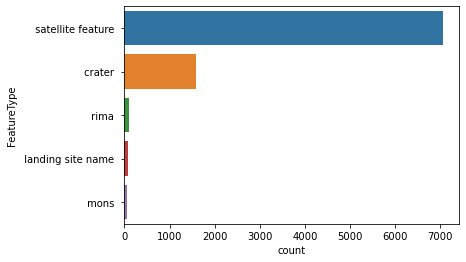

In [4]:
moondata = df[df['Planet Name']=='Moon']


sns.countplot(data=moondata, y='FeatureType',order =moondata['FeatureType'].value_counts().index[:5])



This plot displays the top 5 feature types on the moon. This data plot shows how the moon mostly consists of satellite features and craters. 

## Top 5 Features on Venus 

<AxesSubplot:xlabel='count', ylabel='FeatureType'>

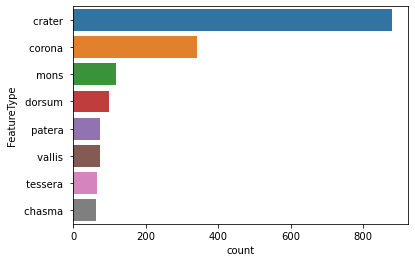

In [5]:
venusdata = df[df['Planet Name'] == 'Venus']

venusdata.reset_index()

sns.countplot(data = venusdata , y='FeatureType', order=venusdata['FeatureType'].value_counts().index[:8])

## Venus Planet Feature Map

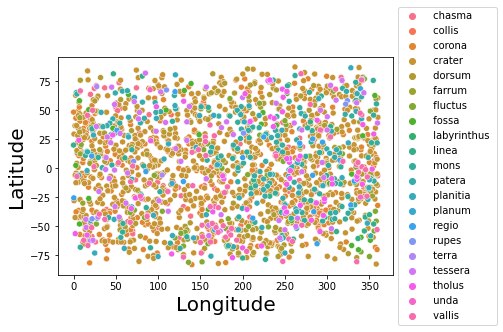

In [6]:
venus_features = sns.scatterplot(data = venusdata, y='Latitude of Center of Planetary Feature',x='Longitude of Center of Planetary Feature',hue='FeatureType')

plt.xlabel("Longitude", size=20)
plt.ylabel("Latitude", size=20)

venus_features.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1)
# map of geo locations of all planetary features on the venus

## Moon Feature Map

Text(0, 0.5, 'Latitude')

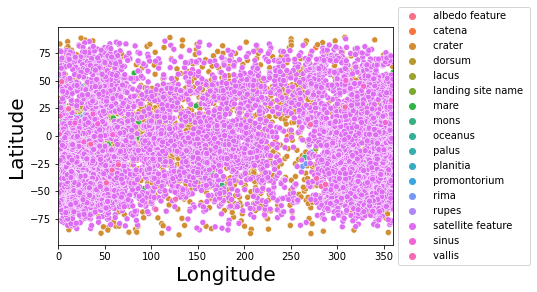

In [7]:
moon_features = sns.scatterplot(data = moondata, y='Latitude of Center of Planetary Feature',x='Longitude of Center of Planetary Feature', hue='FeatureType')
moon_features.set(xlim=(0, 360))
moon_features.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1)
plt.xlabel("Longitude", size=20)
plt.ylabel("Latitude", size=20)

# map of geo locations of all planetary features on the moon

# **Moon Features and Size Map**


This section will focus on soley moon data points


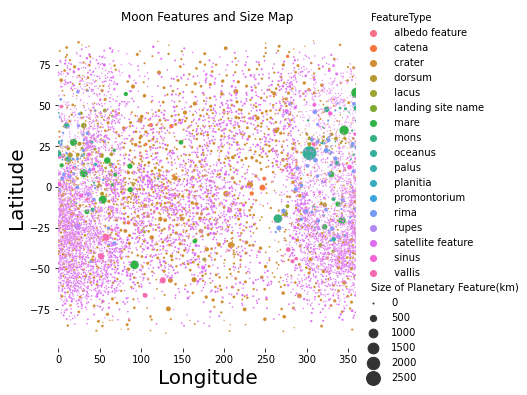

In [8]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

#c = sns.color_palette("flare", as_cmap=True)


moon_feat_size_map = sns.relplot(
    data=moondata,
    y="Latitude of Center of Planetary Feature", x="Longitude of Center of Planetary Feature",
    hue="FeatureType", size="Size of Planetary Feature(km)",
    sizes=(1, 200))
moon_feat_size_map.set(title='Moon Features and Size Map')
moon_feat_size_map.set(xlim=(0, 360))
moon_feat_size_map.set_xlabels("Longitude", size=20)
moon_feat_size_map.set_ylabels("Latitude", size=20)
moon_feat_size_map.despine(left=True, bottom=True)


The visualization illustrates the many types of features and their sizes located on the moon. Each feature is placed based on their Longitude and Latitude location. Every point on the graph is sized based on the planet feature it represents. In order to understand the types of features as an avg. viewer you would need to translate the greek names of features to their english meanings. 

# **Venus Features and Size Map**

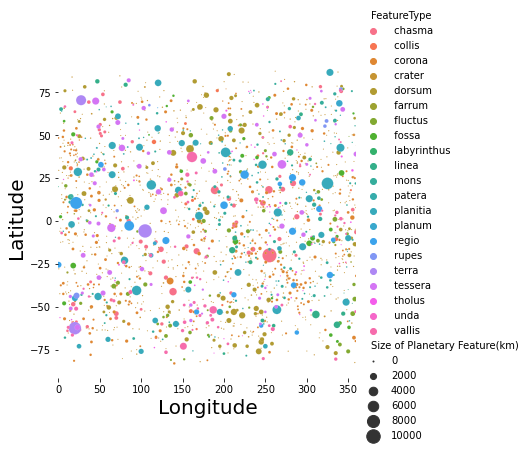

In [9]:
venus_feat_size_map = sns.relplot(
    data=venusdata,
    y="Latitude of Center of Planetary Feature", x="Longitude of Center of Planetary Feature",
    hue="FeatureType", size="Size of Planetary Feature(km)",
    sizes=(1, 200))
venus_feat_size_map.set(xlim=(0, 360))
venus_feat_size_map.ax.xaxis.grid(True, "minor", linewidth=.25)
venus_feat_size_map.ax.yaxis.grid(True, "minor", linewidth=.25)
venus_feat_size_map.set_xlabels("Longitude", size=20)
venus_feat_size_map.set_ylabels("Latitude", size=20)
venus_feat_size_map.despine(left=True, bottom=True)

This visualization displays to the location and size of features on venus. Similar to the moon plot from above. In comparison to the moon venus has much fewer satellite features in its surface. This visualization shows that venus has an abundance of craters and mountains(mons). A feature more prevelent on the surface are 'Regio' which are large areas on the surface that color distinctions from adjacent areas. Venus has many of these, indicating a colorful surface when compared to other bodies such as the moon.

# Mars Features and Size Map

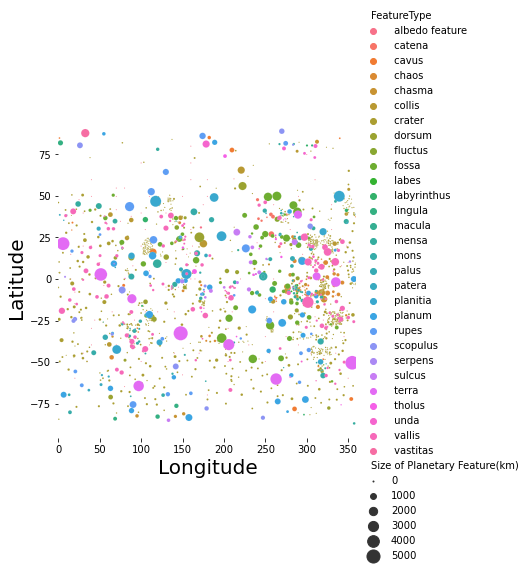

In [10]:
marsdata = df[df['Planet Name']== 'Mars']

mars_feat_size_map = sns.relplot(
    data=marsdata,
    y="Latitude of Center of Planetary Feature", x="Longitude of Center of Planetary Feature",
    hue="FeatureType", size="Size of Planetary Feature(km)",
    sizes=(1, 200))
mars_feat_size_map.set(xlim=(0, 360))
mars_feat_size_map.ax.xaxis.grid(True, "minor", linewidth=.25)
mars_feat_size_map.ax.yaxis.grid(True, "minor", linewidth=.25)
mars_feat_size_map.set_xlabels("Longitude", size=20)
mars_feat_size_map.set_ylabels("Latitude", size=20)
mars_feat_size_map.despine(left=True, bottom=True)



This is the surface graph of mars. This visual gives a good indication to the many large land masses present on mars. This feature is called 'terra' which just means large land feature. If you look at region [300,0] there are some clustors of crators something unlike the other planet bodies. 